# Customer Churn Case Study- Classification

***Scenario***:
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder



## Loading Data

In [292]:
# import our data set
churnData=pd.read_csv("Data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Studying data


In [293]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [294]:
#We need to convert the variable "TotalCharges" in numerical.
churnData["TotalCharges"]=pd.to_numeric(churnData["TotalCharges"],errors='coerce')

In [295]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [296]:
#Check the null values
nulls_df = pd.DataFrame(round(churnData.isna().sum()/len(churnData),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,gender,0.00
1,SeniorCitizen,0.00
2,Partner,0.00
3,Dependents,0.00
4,tenure,0.00
5,PhoneService,0.00
6,OnlineSecurity,0.00
7,OnlineBackup,0.00
8,DeviceProtection,0.00
9,TechSupport,0.00


In [297]:
#We can replace null values with the mean. 
mean_TotalCharges= np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_TotalCharges)


In [298]:
nulls_df = pd.DataFrame(round(churnData.isna().sum()/len(churnData),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,gender,0.0
1,SeniorCitizen,0.0
2,Partner,0.0
3,Dependents,0.0
4,tenure,0.0
5,PhoneService,0.0
6,OnlineSecurity,0.0
7,OnlineBackup,0.0
8,DeviceProtection,0.0
9,TechSupport,0.0


In [299]:
Y= (churnData[["Churn"]].replace("Yes",1)).replace("No",0)


In [300]:
smote = SMOTE()

## XY Split

In [301]:
#We can see that the data are not balanced. 
#First we will check the result with unbalanced data
Y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [302]:
#We get numerical data

X=churnData._get_numeric_data()
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [303]:
Y.shape

(7043, 1)

## Regression with unbalanced data

### Logistic regression

In [304]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=1000)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [305]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log),
                                        recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})


,Error_metric,Train,Test
0,Accuracy,0.786297,0.806246
1,Precision,0.644841,0.700000
2,Recall,0.434492,0.469169


Confusion matrix for the train set
[[3780  358]
 [ 846  650]]


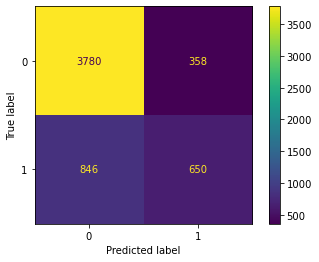



Confusion matrix for the test set
[[961  75]
 [198 175]]


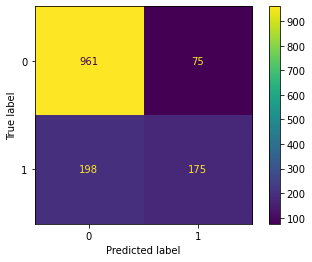

In [306]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Cross validation

In [307]:
scores=cross_val_score(log, X_train, y_train, cv=10)
scores

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

array([0.78191489, 0.79609929, 0.7748227 , 0.79432624, 0.79218472,
       0.74777975, 0.77619893, 0.80994671, 0.79573712, 0.79573712])

In [308]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


In [309]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


### Decision Trees

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


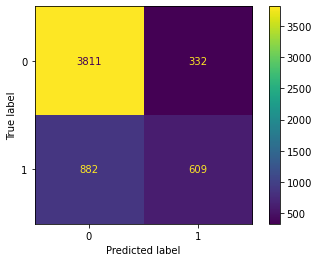



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


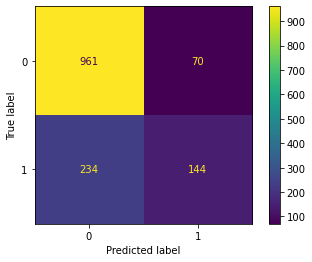

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=400,max_depth=4)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

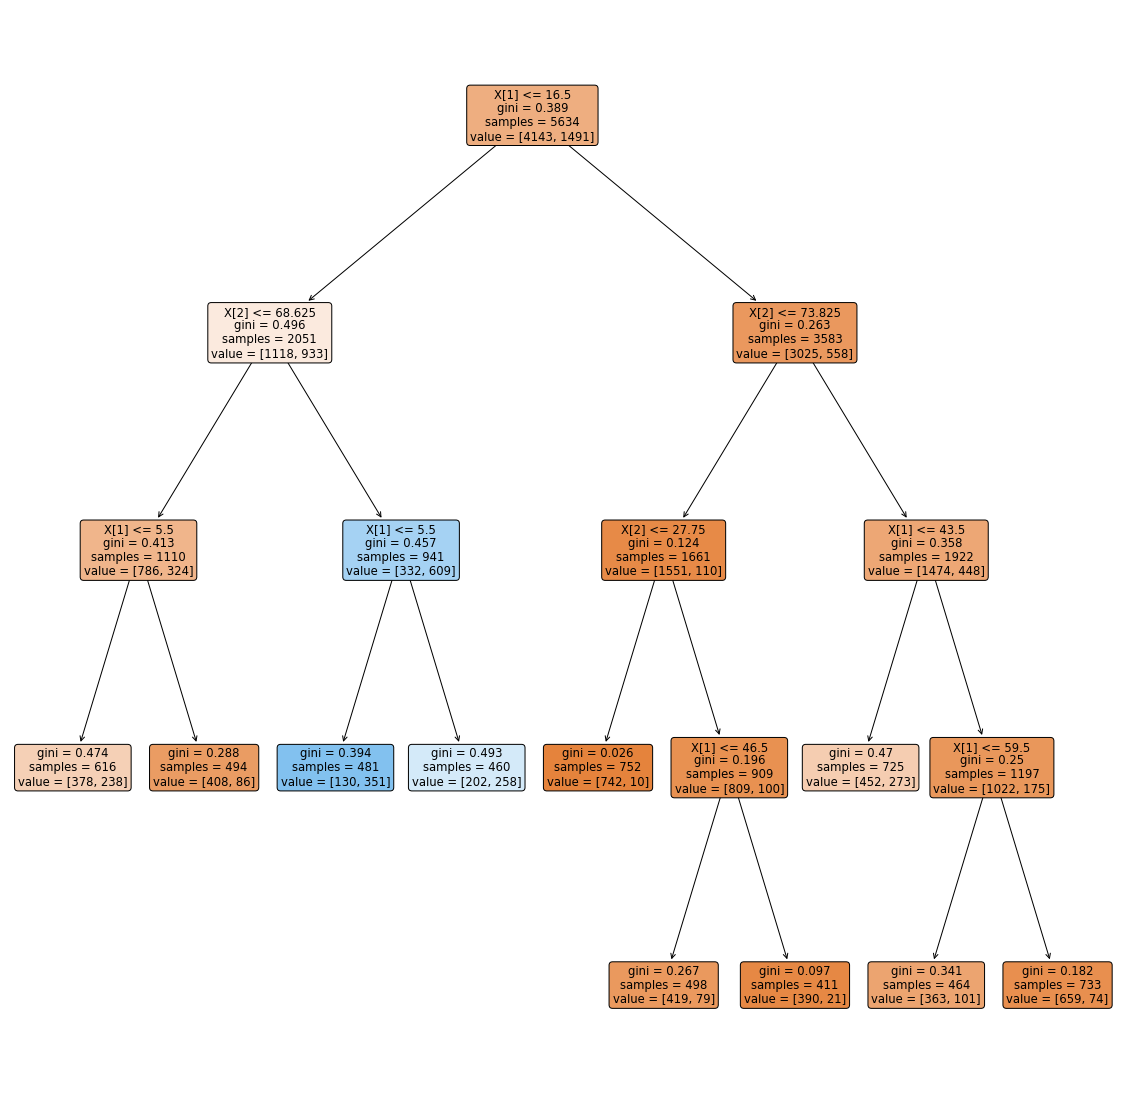

In [311]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

#### Cross Validation

In [312]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.77196096, 0.78881988, 0.78438332, 0.77639752, 0.78952043])

## Upsampling the target variable. 
As we can see, we have anbanlanced data in our target variable. 
We will balance the data upsampling the target variable. 
In order to do this we will use the library SMOTE. 

In [313]:
X_sm, y_sm = smote.fit_resample(X, Y)
y_sm.value_counts()

Churn
0        5174
1        5174
dtype: int64

### Logistic regression

In [314]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=1000)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)



C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [315]:

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log),
                                        recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})


,Error_metric,Train,Test
0,Accuracy,0.786297,0.806246
1,Precision,0.644841,0.700000
2,Recall,0.434492,0.469169


Confusion matrix for the train set
[[3780  358]
 [ 846  650]]


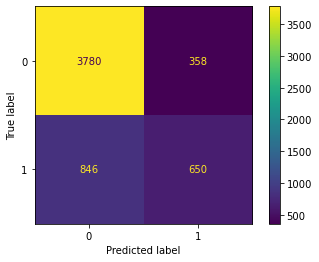



Confusion matrix for the test set
[[961  75]
 [198 175]]


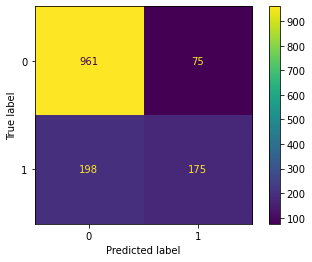

In [316]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Cross validation

In [317]:
scores=cross_val_score(log, X_train, y_train, cv=10)
scores

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

array([0.78191489, 0.79609929, 0.7748227 , 0.79432624, 0.79218472,
       0.74777975, 0.77619893, 0.80994671, 0.79573712, 0.79573712])

In [318]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


### Decision Trees

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


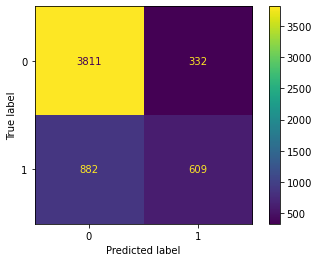



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


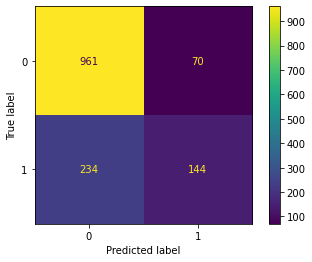

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=400,max_depth=4)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

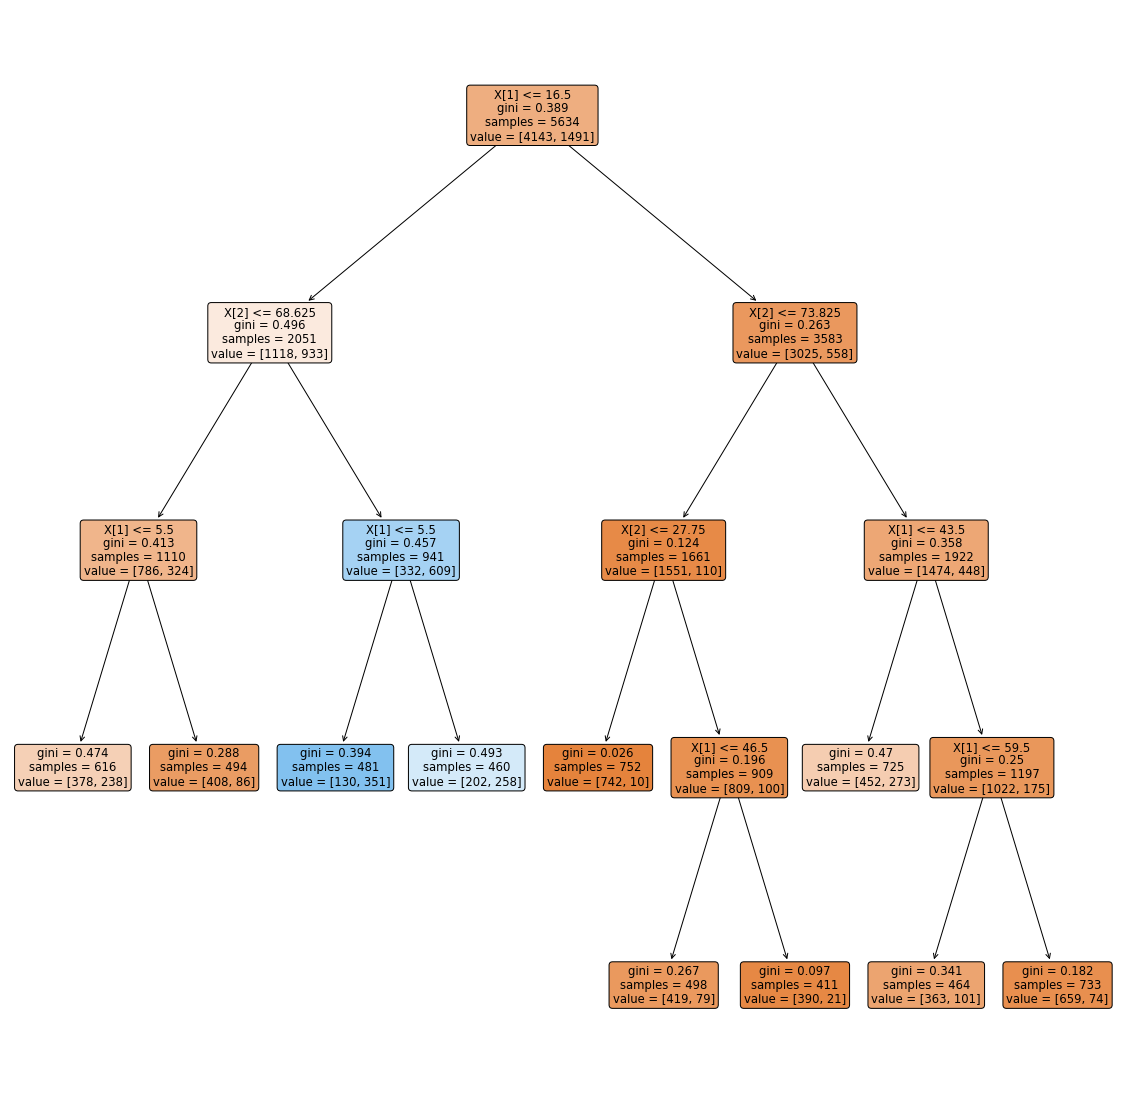

In [320]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

#### Cross Validation

In [321]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.77196096, 0.78881988, 0.78438332, 0.77639752, 0.78952043])

In [322]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [323]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Random Forest

In [324]:
X = churnData.drop(['Churn'], axis = 1)

In [325]:
numericalX = X.select_dtypes(np.number)
categorcalX = X.select_dtypes(np.object)

In [326]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categorcalX)
encoded_categorical = encoder.transform(categorcalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [328]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [329]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\merce\AppData\Local\Temp/ipykernel_1100/3771721527.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.7370812038614424


#### Cross Validation

In [330]:
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_scores

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation

array([0.73345936, 0.73345936, 0.73484848, 0.73484848, 0.73484848,
       0.73484848, 0.73295455, 0.73295455, 0.73295455, 0.73295455])

In [331]:
np.mean(cross_val_scores)

0.7338130835767886

### Model comparison with upsampling method

In [332]:
decision_tree = DecisionTreeClassifier()

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()


model_pipeline = [decision_tree, logistic_regression,random_forest]
model_names = ['Decision Tree', 'Logistic Regression', 'random_forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

{'Decision Tree': 0.7351371448639661, 'Logistic Regression': 0.7955305180470743, 'random_forest': 0.7902276669246867}


Logistic regression is the better model with an R2 of 0.793306

## Downsampling the target varible
In orer to downsampling the target variable, we use Tomeklink

In [333]:
#remember that our target variable has:
Y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [334]:
category_0 = Y[Y['Churn'] == 0]
category_1 = Y[Y['Churn'] == 1]

In [335]:
category_0_down = category_0.sample(len(category_1,))

In [336]:
Y = pd.concat([category_0_down, category_1], axis=0)

In [337]:
#We downsampled the target variable. 
Y.value_counts()

Churn
0        1869
1        1869
dtype: int64

In [338]:
len(Y)

3738

In [339]:
X=X.sample(len(Y,))


In [340]:
len(X)

3738

### Logistic regression

In [341]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=1000)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                        precision_score(y_train, y_pred_train_log),
                                        recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})



C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Error_metric,Train,Test
0,Accuracy,0.527090,0.525401
1,Precision,0.526404,0.505747
2,Recall,0.627568,0.611111


Confusion matrix for the train set
[[629 852]
 [562 947]]


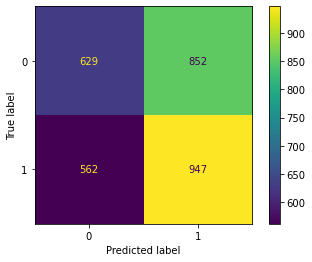



Confusion matrix for the test set
[[173 215]
 [140 220]]


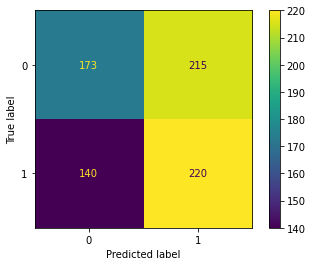

In [342]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

#### Cross Validation

In [343]:
scores=cross_val_score(log, X_train, y_train, cv=10)
scores

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

array([0.50167224, 0.52842809, 0.51505017, 0.47157191, 0.52173913,
       0.47157191, 0.49832776, 0.52173913, 0.48494983, 0.42474916])

In [344]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.49 accuracy with a standard deviation of 0.03


### Decision Trees

,Error_metric,Train,Test
0,Accuracy,0.570569,0.495989
1,Precision,0.569162,0.487047
2,Recall,0.597204,0.512262


Confusion matrix for the train set
[[809 605]
 [679 897]]


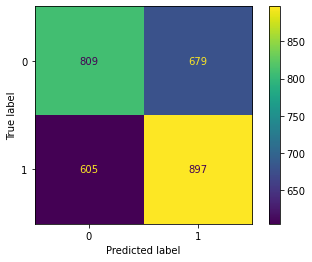



Confusion matrix for the test set
[[183 179]
 [198 188]]


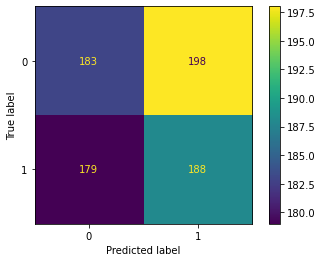

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(min_samples_leaf=100,max_depth=5)# min_samples_leaf nos indica la cantidad minima de elementos que estarán incluidos en la leaf final
                                                            # min_samples_leaf es una buena medida para evitar el overfeeting en el modelo. 
                                                            # en el modelo de regression usamos Lasso o Ridge para evitar el overfeeting
dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

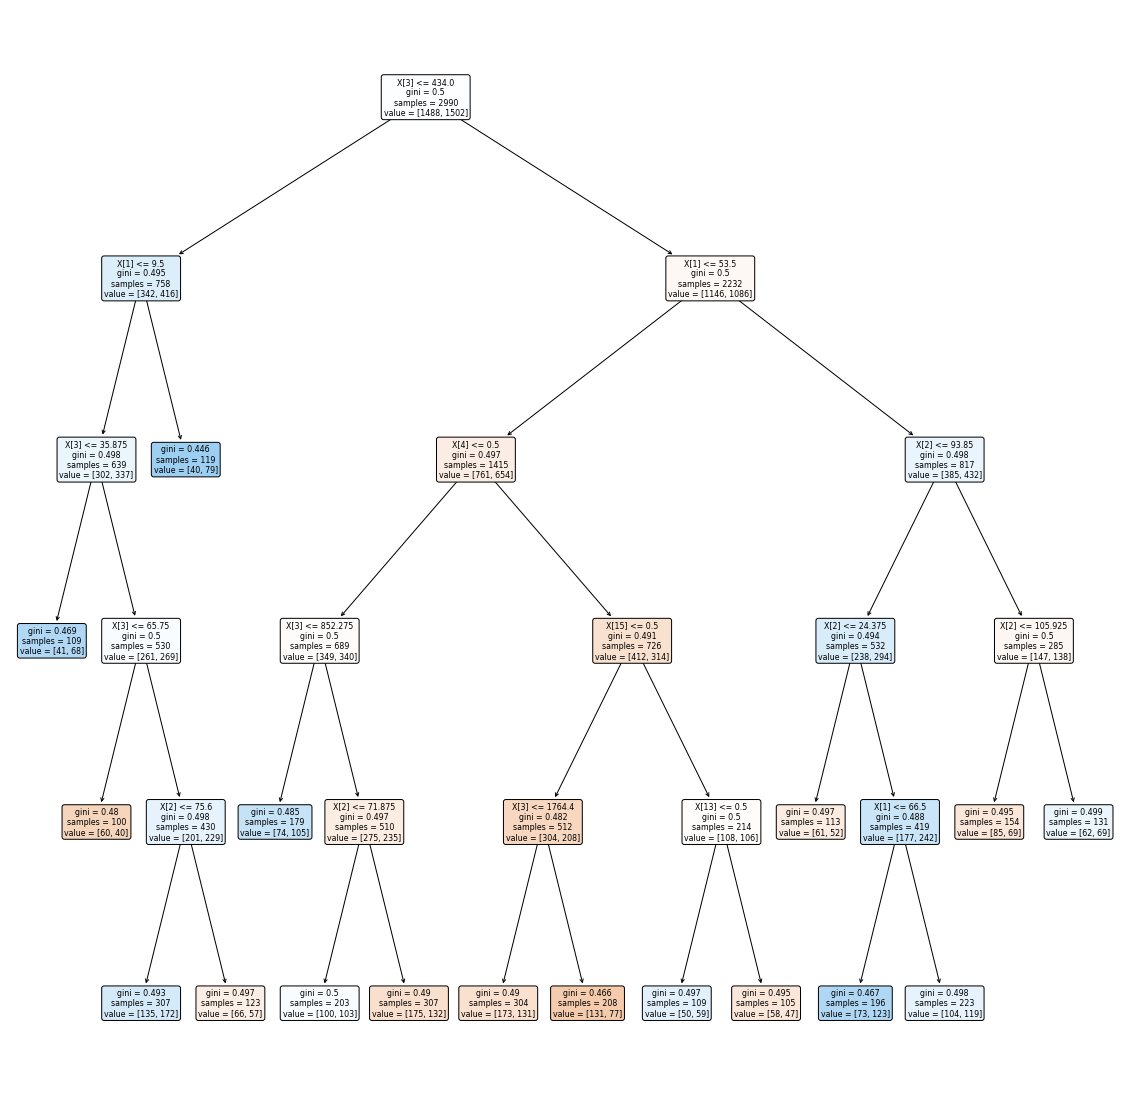

In [346]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

#### Cross validation

In [347]:
scores=cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.5367893 , 0.47993311, 0.52006689, 0.51505017, 0.49331104])

In [348]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.51 accuracy with a standard deviation of 0.02


In [349]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

### Random forest

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [351]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [352]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\merce\AppData\Local\Temp/ipykernel_1100/3771721527.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.517379679144385


#### Cross Validation

In [355]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_scores

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_validation

array([0.47157191, 0.51505017, 0.52508361, 0.51505017, 0.52842809,
       0.50167224, 0.51839465, 0.50167224, 0.45819398, 0.53511706])

In [356]:
np.mean(cross_val_scores)

0.5070234113712374

### Model comparison with downsampling method

In [354]:
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
KNN = KNeighborsRegressor()


model_pipeline = [decision_tree, logistic_regression,KNN]
model_names = ['Decision Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

{'Decision Tree': 0.5046822742474917, 'Logistic Regression': 0.49799331103678934, 'KNN': -0.19316014631785405}
